In [1]:
!pip install pycaret[full]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.9/483.9 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 50.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 20.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 54.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 95.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 62.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.8/90.8 kB 15.2 M

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pycaret

In [2]:
journey_data = pd.read_csv('journey_data.csv', sep=';').drop(columns=['Unnamed: 0'])
journey_data

elvira_id       start_ts                           route  \
0      519191#967_230223  1677189220919            Boráros tér - Csepel   
1         6476131_230906  1694002819285  Székesfehérvár - Budapest-Déli   
2         6504574_230901  1693536631370      Nagykáta - Budapest-Keleti   
3         6443830_230522  1684730578706                Szolnok - Hatvan   
4         6441500_230516  1684208224399          Aszód - Balassagyarmat   
...                  ...            ...                             ...   
99995     6525165_230412  1681275385110          Budapest-Keleti - Pécs   
99996     6471001_230716  1689495736876       Keszthely - Budapest-Déli   
99997     6441826_230615  1686825105052             Mátészalka - Záhony   
99998     6441652_230615  1686812031195         Békéscsaba - Mezőhegyes   
99999     6441440_230327  1679932693016            Ózd - Miskolc-Tiszai   

      train_number line_kind line  journey_avg_delay  \
0          36H3318       HEV  NaN           0.181818   
1           554513       MAV  NaN           5.023256   
2           553659       MAV  NaN           6.020000   
3           555727       MAV  NaN           5.322581   
4          5533510       MAV  NaN           1.700000   
...            ...       ...  ...                ...   
99995        55800       MAV  NaN           4.894737   
99996        55865       MAV  NaN          13.550562   
99997      5536824       MAV  NaN           0.102041   
99998      5537012       MAV  NaN           0.475000   
99999       555411       MAV  NaN           2.093750   

                                  delay_cause  
0                                         NaN  
1                                         NaN  
2                  Tartózkodási idő túllépése  
3      Biztosítóberendezési hiba miatti késés  
4                                         NaN  
...                                       ...  
99995             Pálya állapota miatti késés  
99996             Pálya állapota miatti késés  
99997                                     NaN  
99998                                     NaN  
99999                                     NaN  

[100000 rows x 8 columns]

In [4]:
journey_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   elvira_id          100000 non-null  object 
 1   start_ts           100000 non-null  int64  
 2   route              100000 non-null  object 
 3   train_number       100000 non-null  object 
 4   line_kind          100000 non-null  object 
 5   line               7708 non-null    object 
 6   journey_avg_delay  99996 non-null   float64
 7   delay_cause        20557 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 6.1+ MB


In [5]:
len(journey_data.route.unique())

926

In [6]:
print(len(journey_data.elvira_id.unique()))
print(journey_data[journey_data.elvira_id.duplicated(False)].head(10))
kept_idx = journey_data.groupby('elvira_id')['journey_avg_delay'].idxmax()
journey_data = journey_data[np.isin(journey_data.index, kept_idx)]
journey_data

96789
          elvira_id       start_ts                          route  \
3    6443830_230522  1684730578706               Szolnok - Hatvan   
14   6448117_230330  1680196763608  Budapest-Keleti - Szombathely   
44   6475863_230813  1691945690331      Keszthely - Budapest-Déli   
52   6993354_231012  1697126001144           Pécs - Zalaszentiván   
62   6448593_230306  1678137077466    Budapest-Nyugati - Debrecen   
105  6476436_230716  1689528679317        Tapolca - Budapest-Déli   
106  6443529_230809  1691548100390              Győr - Celldömölk   
133  6445143_230917  1694956695127           Budapest-Déli - Győr   
134  6441586_230605  1685964933184            Békéscsaba - Szeged   
156  6441608_230629  1688050085617                 Gyoma - Vésztő   

    train_number line_kind line  journey_avg_delay  \
3         555727       MAV  NaN           5.322581   
14         55938     GYSEV  NaN           0.121212   
44         55861       MAV   26          10.000000   
52        558901  

elvira_id       start_ts                            route  \
0      519191#967_230223  1677189220919             Boráros tér - Csepel   
1         6476131_230906  1694002819285   Székesfehérvár - Budapest-Déli   
2         6504574_230901  1693536631370       Nagykáta - Budapest-Keleti   
3         6443830_230522  1684730578706                 Szolnok - Hatvan   
4         6441500_230516  1684208224399           Aszód - Balassagyarmat   
...                  ...            ...                              ...   
99994     6442663_230514  1684048395938  Székesfehérvár - Pusztaszabolcs   
99995     6525165_230412  1681275385110           Budapest-Keleti - Pécs   
99996     6471001_230716  1689495736876        Keszthely - Budapest-Déli   
99997     6441826_230615  1686825105052              Mátészalka - Záhony   
99998     6441652_230615  1686812031195          Békéscsaba - Mezőhegyes   

      train_number line_kind line  journey_avg_delay  \
0          36H3318       HEV  NaN           0.181818   
1           554513       MAV  NaN           5.023256   
2           553659       MAV  NaN           6.020000   
3           555727       MAV  NaN           5.322581   
4          5533510       MAV  NaN           1.700000   
...            ...       ...  ...                ...   
99994      5534137       MAV  NaN           0.181818   
99995        55800       MAV  NaN           4.894737   
99996        55865       MAV  NaN          13.550562   
99997      5536824       MAV  NaN           0.102041   
99998      5537012       MAV  NaN           0.475000   

                                  delay_cause  
0                                         NaN  
1                                         NaN  
2                  Tartózkodási idő túllépése  
3      Biztosítóberendezési hiba miatti késés  
4                                         NaN  
...                                       ...  
99994                                     NaN  
99995             Pálya állapota miatti késés  
99996             Pálya állapota miatti késés  
99997                                     NaN  
99998                                     NaN  

[96785 rows x 8 columns]

In [7]:
print(len(journey_data.elvira_id.unique()), len(journey_data))

96785 96785


False    78214
True     18571
Name: larger_delay_than_5, dtype: int64


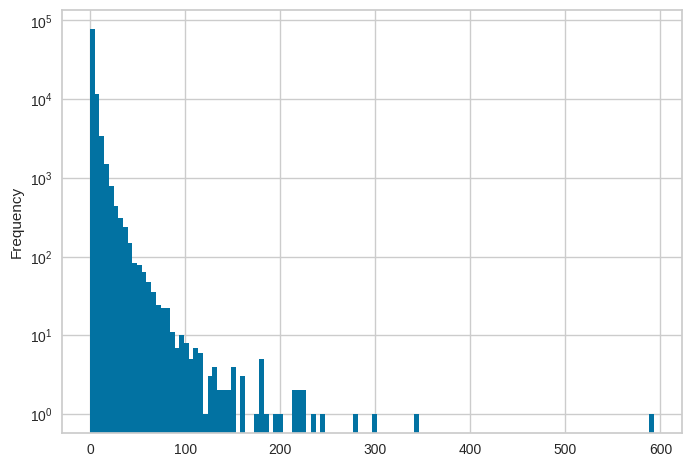

In [8]:
model_data = journey_data.drop(columns=['elvira_id', 'delay_cause', 'line'])
model_data['journey_avg_delay'] = np.where(pd.isna(model_data['journey_avg_delay']), 0, model_data['journey_avg_delay'])
model_data['journey_avg_delay'].plot(kind='hist', bins = 120, log=True)

model_data['larger_delay_than_5'] = model_data['journey_avg_delay'].apply(lambda x: x > 5)
print(model_data.larger_delay_than_5.value_counts())

In [9]:
model_data['start_ts'] = pd.to_datetime(model_data['start_ts'], unit='ms')
model_data['dow'] = model_data['start_ts'].dt.dayofweek
model_data['month'] = model_data['start_ts'].dt.month

In [10]:
model_data

start_ts                            route train_number  \
0     2023-02-23 21:53:40.919             Boráros tér - Csepel      36H3318   
1     2023-09-06 12:20:19.285   Székesfehérvár - Budapest-Déli       554513   
2     2023-09-01 02:50:31.370       Nagykáta - Budapest-Keleti       553659   
3     2023-05-22 04:42:58.706                 Szolnok - Hatvan       555727   
4     2023-05-16 03:37:04.399           Aszód - Balassagyarmat      5533510   
...                       ...                              ...          ...   
99994 2023-05-14 07:13:15.938  Székesfehérvár - Pusztaszabolcs      5534137   
99995 2023-04-12 04:56:25.110           Budapest-Keleti - Pécs        55800   
99996 2023-07-16 08:22:16.876        Keszthely - Budapest-Déli        55865   
99997 2023-06-15 10:31:45.052              Mátészalka - Záhony      5536824   
99998 2023-06-15 06:53:51.195          Békéscsaba - Mezőhegyes      5537012   

      line_kind  journey_avg_delay  larger_delay_than_5  dow  month  
0           HEV           0.181818                False    3      2  
1           MAV           5.023256                 True    2      9  
2           MAV           6.020000                 True    4      9  
3           MAV           5.322581                 True    0      5  
4           MAV           1.700000                False    1      5  
...         ...                ...                  ...  ...    ...  
99994       MAV           0.181818                False    6      5  
99995       MAV           4.894737                False    2      4  
99996       MAV          13.550562                 True    6      7  
99997       MAV           0.102041                False    3      6  
99998       MAV           0.475000                False    3      6  

[96785 rows x 8 columns]

route line_kind  larger_delay_than_5  dow  \
0                 Boráros tér - Csepel       HEV                False    3   
1       Székesfehérvár - Budapest-Déli       MAV                 True    2   
2           Nagykáta - Budapest-Keleti       MAV                 True    4   
3                     Szolnok - Hatvan       MAV                 True    0   
4               Aszód - Balassagyarmat       MAV                False    1   
...                                ...       ...                  ...  ...   
99994  Székesfehérvár - Pusztaszabolcs       MAV                False    6   
99995           Budapest-Keleti - Pécs       MAV                False    2   
99996        Keszthely - Budapest-Déli       MAV                 True    6   
99997              Mátészalka - Záhony       MAV                False    3   
99998          Békéscsaba - Mezőhegyes       MAV                False    3   

       month  tn_len  
0          2       7  
1          9       6  
2          9       6  
3          5       6  
4          5       7  
...      ...     ...  
99994      5       7  
99995      4       5  
99996      7       5  
99997      6       7  
99998      6       7  

[96785 rows x 6 columns]

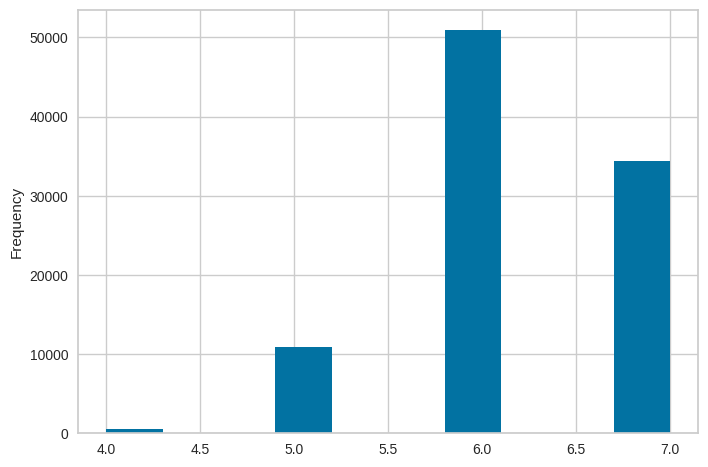

In [11]:
# TODO check for train replacement buses (add it as input data)
binary_class_data = model_data.drop(columns=['journey_avg_delay', 'start_ts'])


binary_class_data['train_number'] = np.where(
    binary_class_data['line_kind']=='HEV',
    binary_class_data['train_number'].apply(lambda x: x[3:]),
    binary_class_data['train_number'].apply(lambda x: x[2:])
    )
binary_class_data['tn_len'] = binary_class_data.train_number.apply(len)
binary_class_data['tn_len'].plot(kind='hist')

binary_class_data = binary_class_data.drop(columns=['train_number'])
#binary_class_data.query('tn_len == 2') # international railjets/ics but probably not owned by mav?
#binary_class_data.query('tn_len == 3')# IC/IR/IEUC (Inter European Metropolitan City)
#binary_class_data.query('tn_len == 4')# mostly small trains, some IR
#binary_class_data.query('tn_len == 5')# only small trains
binary_class_data

In [ ]:
results = []

In [12]:
import pycaret.classification as pc
s = pc.setup(
    binary_class_data,
    target='larger_delay_than_5',
    session_id=123,
    categorical_features=['tn_len', 'route', 'line_kind'],
    max_encoding_ohe=1000,
    use_gpu=True,
    )
s

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset migh

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset migh

In [13]:
best = pc.compare_models()
best

Processing:   0%|          | 0/69 [00:00<?, ?it/s]

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, objective='binary:logistic', ...)

In [90]:
naive_bayes = pc.create_model('nb')
naive_bayes

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

GaussianNB(priors=None, var_smoothing=1e-09)

In [14]:
random_forest = pc.create_model('rf')
random_forest

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)

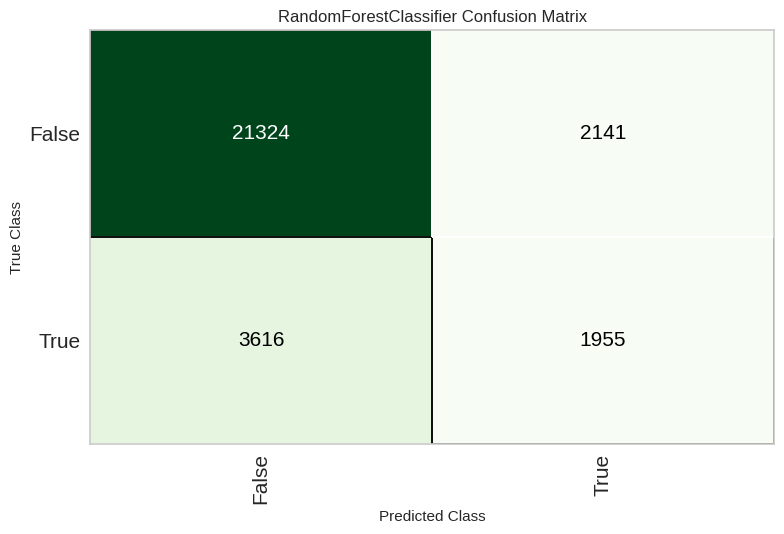

In [15]:
pc.plot_model(random_forest, plot = 'confusion_matrix')

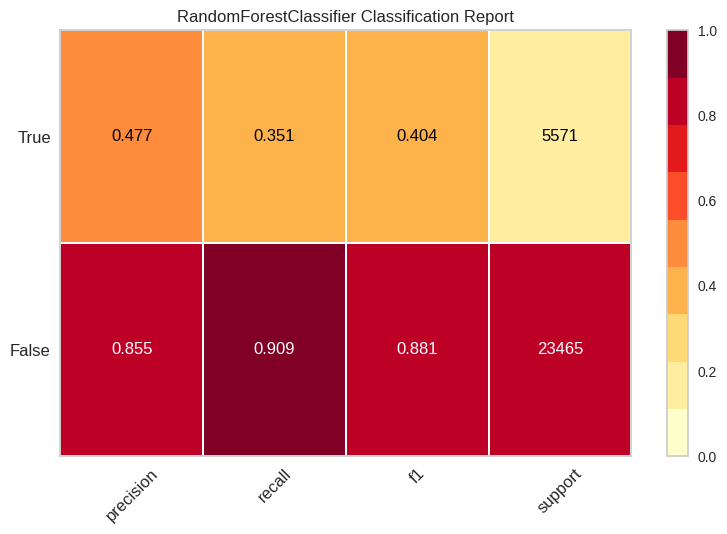

In [17]:
pc.plot_model(random_forest, plot = 'class_report')

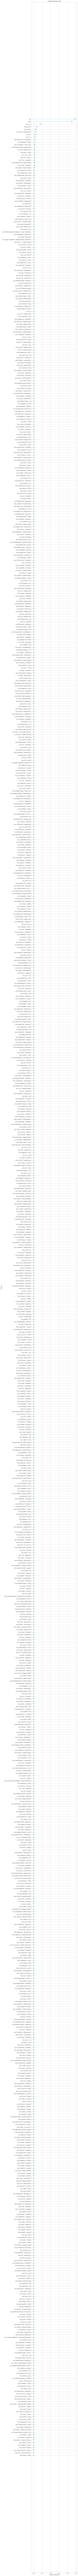

In [20]:
pc.plot_model(random_forest, plot = 'feature_all')

In [21]:
lda = pc.create_model('lda')
lda

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

LinearDiscriminantAnalysis(covariance_estimator=None, n_components=None,
                           priors=None, shrinkage=None, solver='svd',
                           store_covariance=False, tol=0.0001)

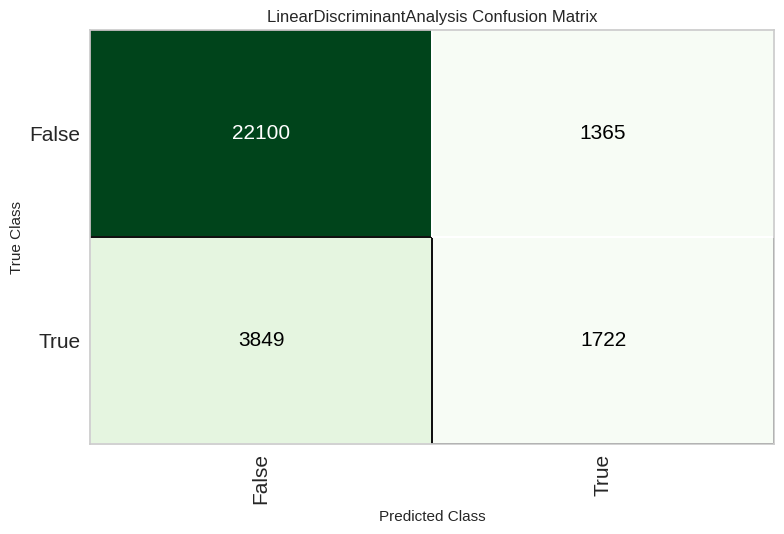

In [22]:
pc.plot_model(lda, plot = 'confusion_matrix')

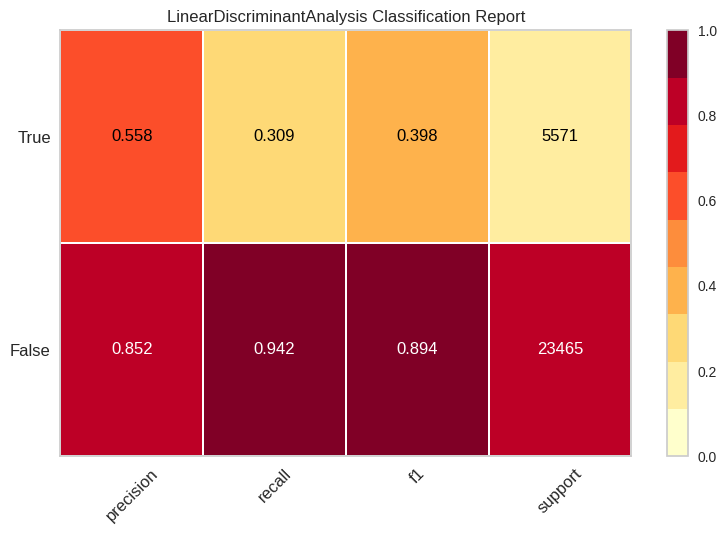

In [23]:
pc.plot_model(lda, plot = 'class_report')

In [25]:
pc.create_api(random_forest, 'rf_delay_api')

API successfully created. This function only creates a POST API, it doesn't run it automatically. To run your API, please run this command --> !python rf_delay_api.py


In [26]:
pc.create_docker('rf_delay_api')

Writing requirements.txt
Writing Dockerfile
Dockerfile and requirements.txt successfully created.
    To build image you have to run --> !docker image build -f "Dockerfile" -t IMAGE_NAME:IMAGE_TAG .
            
